<a href="https://colab.research.google.com/github/kslim1025/Tensorflow_Clab/blob/master/WineAnalysis_Entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]
   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9   

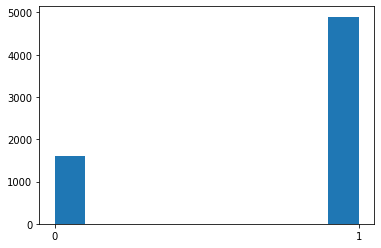

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None
   fixed acidity  volatile acidity  citric acid  ...   alcohol   quali

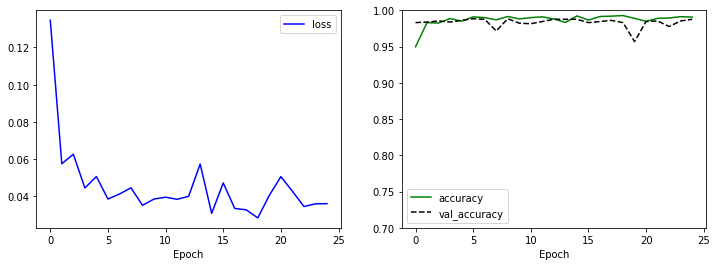

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


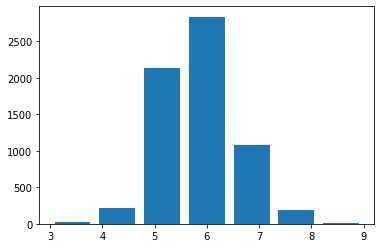

count    6497.000000
mean        1.026166
std         1.073611
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: new_quality, dtype: float64


AttributeError: ignored

In [36]:
#캘리포니아 어바인 대학에서 제공하는 데이터세트 사용
#외부 데이터를 이용한 정제과정
#ctrl+enter를 사용한 런타임가능
try:
  # %tensorflow_version only exists in Colab
  %tensorflow_version 2.x
except Exception:
  pass

# 넘파이는 수학과 과학 연산에 특화된 파이썬 모듈로 딥러닝에서도 유용하게 사용된다.

import numpy as np;
import tensorflow as tf;
import pandas as pd;
import matplotlib.pyplot as plt;

#레드와인과 화이트와인 데이터 주소
#데이터는 주석산 초산 구연산 당도 염화물로 구문되어 출력
red_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';');
white_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';');

print(red_wine.head());
print(white_wine.head());

red_wine['type'] = 0;
white_wine['type'] = 1;
print(red_wine.head(2));
print(white_wine.head(2));

wine = pd.concat([red_wine, white_wine]);
print(wine.describe());

plt.hist(wine['type']);
plt.xticks([0,1]);
plt.show();

#데이터의 정규화를 통해 외부에서 불러오는 데이터 값이 어떻게 되어있는지 확인하기 info()
print(wine.info());
#print(wine['type'].values_counts());

#정규화행 wine_norm = (wine - wine.min()) / (wine.max() - wine.min());
wine_norm = (wine - wine.min()) / (wine.max() - wine.min());
print(wine_norm.head());
print(wine_norm.describe());

#frac=1은 전체데이터 100% 다들어간다로 해석
wine_shuffle = wine_norm.sample(frac=1);
print(wine_shuffle.head());
wine_np =  wine_shuffle.to_numpy();
print(wine_np[:5]);

#여기서 부터 훈련데이터와 테스트 데이터로 나눔
train_idx = int(len(wine_np) * 0.8);
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1];


#회귀 모델과 비슷하지만 다른점은 분류모델이기 떄문에 마지막에 레이어 활성화 함수로 소프트맥스를 사용했습니다
#가장 많이 쓰는 함수는 출력값들을 자연로그의 밑인 e의 지수로 사용해 계산한뒤 모두 더한값으로 나눕니다. 이렇게 나온 결과값들은 총합이 1.0인 확률값이 됩니다
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
                             tf.keras.layers.Dense(units=24, activation='relu'),
                             tf.keras.layers.Dense(units=12, activation='relu'),
                             tf.keras.layers.Dense(units=2, activation='softmax')
]);

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

#네트워크 분류 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25);

#그래프 시각화
plt.figure(figsize=(12,4));

plt.subplot(1, 2, 1);
plt.plot(history.history['loss'],'b-', label='loss');
plt.xlabel('Epoch');
plt.legend();

plt.subplot(1, 2, 2);
plt.plot(history.history['accuracy'], 'g-', label='accuracy');
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy');

plt.xlabel('Epoch');
plt.ylim(0.7, 1);
plt.legend();

plt.show();

#다항분류
# 다항 분류란 범주의 수가 2개를 초과하는 경우
# 앞의 와인데이터세트의 품질이 0~10까지 숫자로 구분뒤어 있어서 다항으로 구분진행
# 와인의 색깔 대신 와인의 품질 예측

print(wine['quality'].describe());
#print(wine['quality'].values_counts());

plt.hist(wine['quality'], bins=7, rwidth=0.8);
plt.show()

#생각보다 제공된 데이터의 양이 적어서 히스토그램에서 숫자 차이가 나기 때문에 모든 범주에 대한 세세한 분류가 어려움
# 대신 품질을 3~5는 나쁨, 7~9는 좋음, 6은 보통으로 수정

wine.loc[wine['quality']<=5, 'new_quality'] = 0
wine.loc[wine['quality']==6, 'new_quality'] = 1
wine.loc[wine['quality']>=7, 'new_quality'] = 3

print(wine['new_quality'].describe());
#print(wine['new_quality'].values_counts());

#데이터 프레임
